In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_farm = pd.read_csv("/data/Pein/Pytorch/Wind-Power-Prediction/data/train_farm_92.csv")
train_merge = pd.read_csv("/data/Pein/Pytorch/Wind-Power-Prediction/data/train_data_92.csv")

test_farm = pd.read_csv("/data/Pein/Pytorch/Wind-Power-Prediction/data/test_farm_92.csv")
test_merge = pd.read_csv("/data/Pein/Pytorch/Wind-Power-Prediction/data/test_data_92.csv")


In [4]:
train_farm_39= pd.read_csv('/data/Pein/Pytorch/Wind-Power-Prediction/data/train_farm_39_withTime.csv')
test_farm_39= pd.read_csv('/data/Pein/Pytorch/Wind-Power-Prediction/data/test_farm_39_withTime.csv')


In [9]:
# Ensure numeric columns
def ensure_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Function to compare columns and print detailed residuals with tolerance
def compare_columns(df1, df2, name1, name2, columns, tolerance=1e-6):
    identical = True
    for col in columns:
        ensure_numeric(df1, [col])
        ensure_numeric(df2, [col])
        if not np.allclose(df1[col], df2[col], atol=tolerance, equal_nan=True):
            identical = False
            diff_indices = ~np.isclose(df1[col], df2[col], atol=tolerance, equal_nan=True)
            print(f"Difference in column: {col}, Number of differences: {diff_indices.sum()}")
            for idx in df1.index[diff_indices]:
                print(f"Index: {idx}, {name1} {col}: {df1.at[idx, col]}, {name2} {col}: {df2.at[idx, col]}")
    if identical:
        print(f"Columns in {name1} and {name2} are identical within tolerance {tolerance}.")


# Get common features for comparison (excluding extra time features in farm_39)
common_columns = train_farm.columns.intersection(train_farm_39.columns).tolist()
common_columns.remove('power')

# Compare time features for train datasets
compare_columns(train_farm, train_merge, "train_farm", "train_merge", common_columns)
compare_columns(train_farm_39, train_farm, "train_farm_39", "train_farm", common_columns)

# Compare time features for test datasets
compare_columns(test_farm, test_merge, "test_farm", "test_merge", common_columns)
compare_columns(test_farm_39, test_farm, "test_farm_39", "test_farm", common_columns)

# Compare power columns for train datasets
compare_columns(train_farm_39, train_farm, "train_farm_39", "train_farm", ['power'])

# Compare power columns for test datasets
compare_columns(test_farm_39, test_farm, "test_farm_39", "test_farm", ['power'])


Columns in train_farm and train_merge are identical within tolerance 1e-06.
Columns in train_farm_39 and train_farm are identical within tolerance 1e-06.
Columns in test_farm and test_merge are identical within tolerance 1e-06.
Columns in test_farm_39 and test_farm are identical within tolerance 1e-06.
Columns in train_farm_39 and train_farm are identical within tolerance 1e-06.
Columns in test_farm_39 and test_farm are identical within tolerance 1e-06.


In [10]:
# Function to check time columns and plot power values
def check_and_plot(train_farm, train_merge, dataset_type="Train"):
    if train_farm['time'].equals(train_merge['time']):
        print(f"The 'time' columns in {dataset_type} DataFrames are identical.")
        
        # Plot the power values with respect to time
        plt.figure(figsize=(15, 6))
        plt.plot(train_farm['time'], train_farm['power'], label=f'{dataset_type} Farm Power', color='blue')
        plt.plot(train_merge['time'], train_merge['power'], label=f'{dataset_type} Merge Power', color='orange')
        
        plt.xlabel('Time')
        plt.ylabel('Power')
        plt.title(f'Power Over Time ({dataset_type} Farm vs. Merge)')
        plt.legend()
        plt.show()
    else:
        print(f"The 'time' columns in the {dataset_type} DataFrames are not identical.")


The 'time' columns in Train DataFrames are identical.


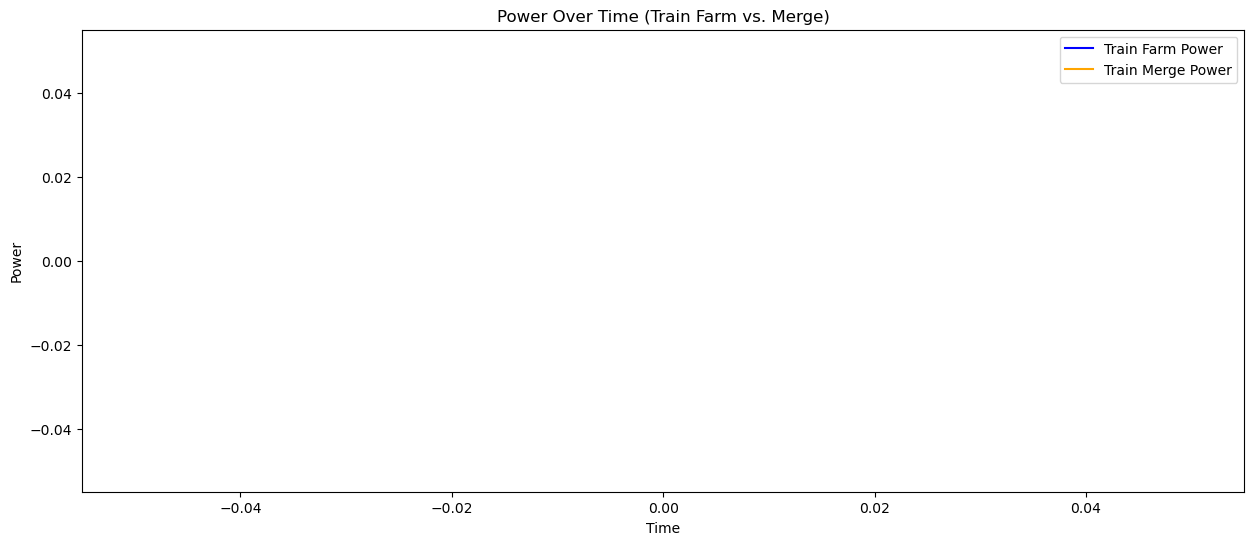

In [13]:
# Check and plot for train data
check_and_plot(train_farm, train_farm_39, "Train")

In [28]:
# Function to calculate and print correlation between power columns
def print_correlation(farm_data, merge_data, dataset_type="Train"):
    correlation = farm_data['power'].corr(merge_data['power'])
    print(f"The correlation between {dataset_type} Farm Power and Merge Power is: {correlation:.4f}")

In [29]:
# Print correlation for train data
print_correlation(train_farm, train_merge, "Train")

# Print correlation for test data
print_correlation(test_farm, test_merge, "Test")

The correlation between Train Farm Power and Merge Power is: 0.9582
The correlation between Test Farm Power and Merge Power is: 0.9595


In [21]:
# Remove the 'power' column for comparison
train_farm_no_power = train_farm.drop(columns=['power'])
train_merge_no_power = train_merge.drop(columns=['power'])

test_farm_no_power = test_farm.drop(columns=['power'])
test_merge_no_power = test_merge.drop(columns=['power'])

# Check if all columns are the same in train data
if train_farm_no_power.equals(train_merge_no_power):
    print("All columns in train_farm are the same as in train_merge (except the 'power' column).")
else:
    print("Columns in train_farm and train_merge differ (excluding the 'power' column).")

# Check if all columns are the same in test data
if test_farm_no_power.equals(test_merge_no_power):
    print("All columns in test_farm are the same as in test_merge (except the 'power' column).")
else:
    print("Columns in test_farm and test_merge differ (excluding the 'power' column).")

All columns in train_farm are the same as in train_merge (except the 'power' column).
All columns in test_farm are the same as in test_merge (except the 'power' column).


### Check data split

In [12]:
data_dir = "/data/Pein/Pytorch/Wind-Power-Prediction/data/"
file_name_common = 'power'
train_farm = pd.read_csv(data_dir + f"train_{file_name_common}_farm.csv")

test_farm = pd.read_csv(data_dir + f"test_{file_name_common}_farm.csv")

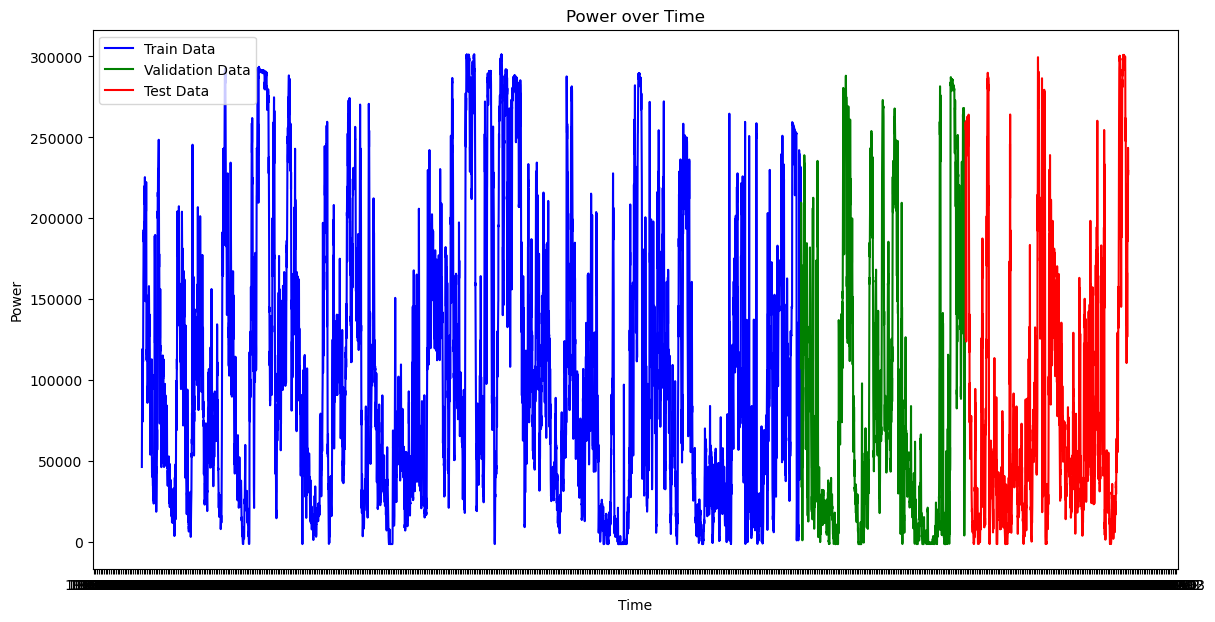

In [13]:
# Split train data into train and validation sets
split_idx = int(0.8 * len(train_farm))
train_set = train_farm.iloc[:split_idx]
val_set = train_farm.iloc[split_idx:]

# Combine test data
test_data = pd.concat([test_farm])

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(train_set['time'], train_set['power'], label='Train Data', color='blue')
plt.plot(val_set['time'], val_set['power'], label='Validation Data', color='green')
plt.plot(test_data['time'], test_data['power'], label='Test Data', color='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power over Time')
plt.legend()
# Format x-axis to show only month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.show()

### Check the selected data

In [16]:
train_farm_54 = pd.read_csv('/data/Pein/Pytorch/Wind-Power-Prediction/data/test_farm_54_withTime.csv')
test_farm_54 = pd.read_csv('/data/Pein/Pytorch/Wind-Power-Prediction/data/train_farm_54_withTime.csv')

In [19]:
print(f'len train_farm: {len(train_farm)}, len test_farm: {len(test_farm)}')

len train_farm: 2880, len test_farm: 14592


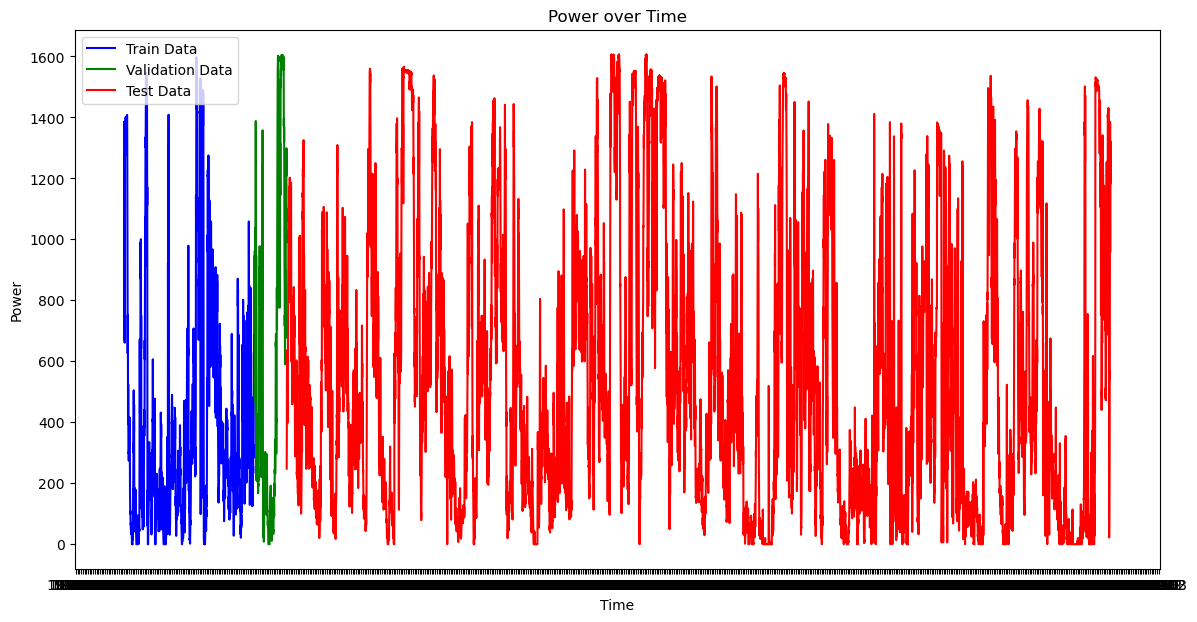

In [17]:
train_farm = train_farm_54
test_farm = test_farm_54

# Split train data into train and validation sets
split_idx = int(0.8 * len(train_farm))
train_set = train_farm.iloc[:split_idx]
val_set = train_farm.iloc[split_idx:]

# Combine test data
test_data = pd.concat([test_farm])

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(train_set['time'], train_set['power'], label='Train Data', color='blue')
plt.plot(val_set['time'], val_set['power'], label='Validation Data', color='green')
plt.plot(test_data['time'], test_data['power'], label='Test Data', color='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power over Time')
plt.legend()
# Format x-axis to show only month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.show()